# Import libs and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
X, y = mnist.data, mnist.target

y = y.astype(np.uint8)

# Plotting MNIST

In [4]:
def plot_digit(x, y=None):
    x = np.reshape(x, (28,28))
    
    fig, ax = plt.subplots(figsize=[2,2])
    ax.imshow(x, cmap='binary')
    plt.title('number: ' + str(y))
    plt.show()
    
def plot_set_digits(X, y=None, nrows=2, ncols=5, start=0, figsize=None, adjust_right=None, adjust_top=None):
    if not figsize: figsize = [12, nrows*2]
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    for i in range(nrows*ncols):
        x = np.reshape(X.iloc[i+start], (28,28))
        row, col = i//ncols, i%ncols
        
        ax[row, col].imshow(x, cmap='binary')
        ax[row, col].axis('off')
        ax[row, col].set_title('y = ' + str(y.iloc[i+start]))
        plt.subplots_adjust(right=adjust_right, top=adjust_top)
    
    plt.show()

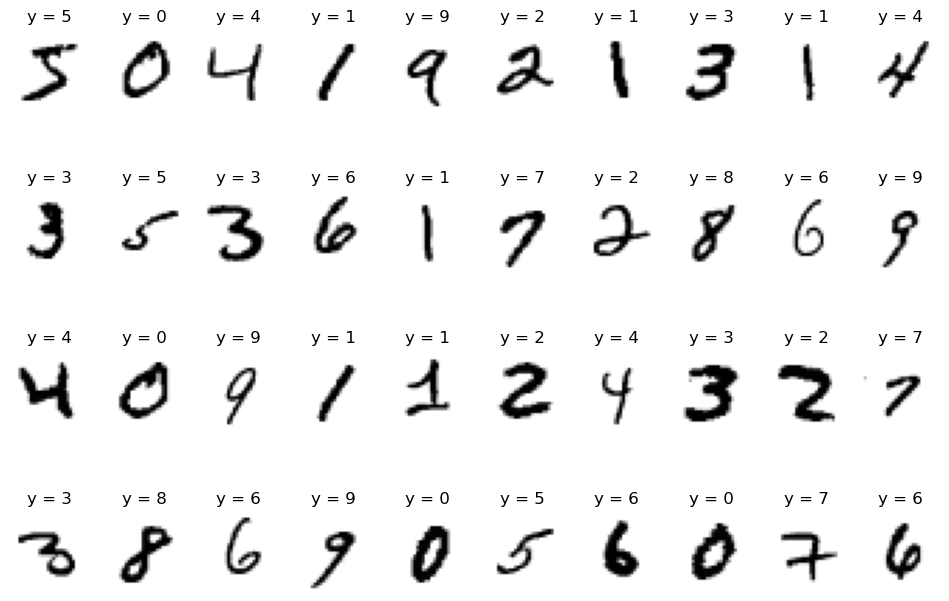

In [5]:
plot_set_digits(X, y, 4, 10)

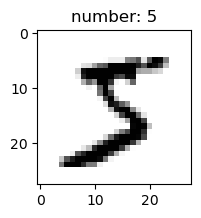

In [6]:
plot_digit(X.iloc[0], y[0])

# Train and test sets

In [7]:
# X_train, X_test = X[:60_000], X[60_000:]
# y_train, y_test = y[:60_000], y[60_000:]

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

sssplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sssplit.split(X, y):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]    

In [9]:
y_train.value_counts() # quantia de instâncias em cada estrato

class
1    6302
7    5834
3    5713
2    5592
9    5567
0    5522
6    5501
8    5460
4    5459
5    5050
Name: count, dtype: int64

In [10]:
number = 3

y_number_train = (y_train == number)

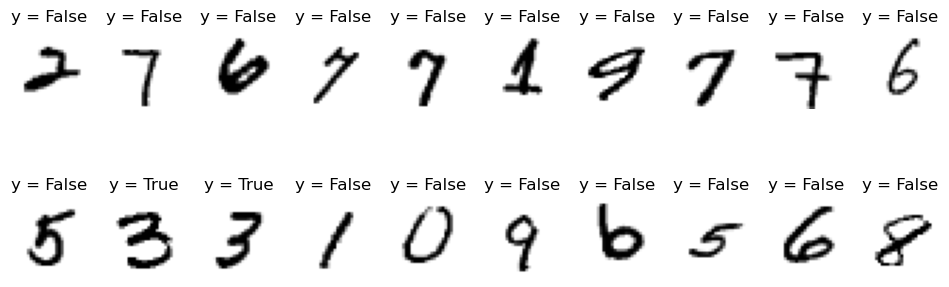

In [11]:
plot_set_digits(X_train, y_number_train, nrows=2, ncols=10, start=21)

# Models

In [12]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# models
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
stochastic = SGDClassifier()
forest = RandomForestClassifier()

## Plotting metrics

In [82]:
def plot_precision_by_recall(y_true, probas_pred, threshold=None, label=''):
    precisions, recalls, thresholds = precision_recall_curve(y_true, probas_pred)
    
    plt.title('Precision x Recall')
    plt.grid(True)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot(recalls, precisions, label=label)
    plt.legend()
    
    if threshold:
        y_scores = (probas_pred >= threshold)
        p = precision_score(y_true, y_scores)
        r = recall_score(y_true, y_scores)

        print(f'Threshold: ( precision: {p}, recall: {r} )')
        plt.axhline(p, color='black', linestyle=':')
        plt.axvline(r, color='black', linestyle=':')
        plt.plot(r, p, 'k.')
    
        return p, r

def plot_roc(y_true, probas_pred, threshold=None, label=''):
    fpr, tpr, thresholds = roc_curve(y_true, probas_pred)
    
    plt.title('ROC Curve')
    plt.grid(True)
    plt.plot((0,1), (0,1), 'r:')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, label=label)
    plt.legend()
    
    if threshold:
        y_scores = (probas_pred >= threshold)
        cm = confusion_matrix(y_true, y_scores)
        fpr_threshold = cm[0,1] / (cm[0,1] + cm[0,0])
        tpr_threshold = recall_score(y_true, y_scores)

        print(f'Threshold: ( tpr: {tpr_threshold}, fpr: {fpr_threshold} )')

        plt.axvline(fpr_threshold, color='black', linestyle=':')
        plt.axhline(tpr_threshold, color='black', linestyle=':')
        plt.plot(fpr_threshold, tpr_threshold, 'k.')
    
        return fpr_threshold, tpr_threshold
    
def plot_graphs(models, y_true, y_predictions, thresholds=None, labels=[]):
    plt.figure(figsize=(10,4))
    
    for i, model in enumerate(models):
        if thresholds and thresholds[i]:
            t = thresholds[i]
        else: t = None
        
        plt.subplot(121)
        plot_precision_by_recall(y_true, y_predictions[i], label=labels[i], threshold=t)

        plt.subplot(122)
        plot_roc(y_true, y_predictions[i], label=labels[i], threshold=t)

        print(f'AUC {labels[i]} :', roc_auc_score(y_true, y_predictions[i]))

## Stochastic Gradient Descender

In [15]:
stochastic.fit(X_train, y_number_train)

SGDClassifier()

In [16]:
y_predictions_stochastic = cross_val_predict(
    stochastic,
    X_train,
    y_number_train,
    cv=3
)

In [17]:
y_predictions_stochastic

array([False, False, False, ..., False, False, False])

In [18]:
cm_stochastic = confusion_matrix(y_number_train, y_predictions_stochastic, labels=stochastic.classes_)
cm_stochastic

array([[48893,  1394],
       [  952,  4761]], dtype=int64)

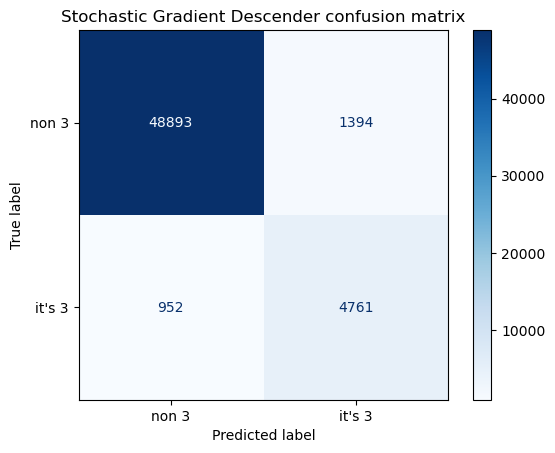

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['non {}'.format(number), "it's {}".format(number)]

cmd_stochastic = ConfusionMatrixDisplay(cm_stochastic, display_labels=labels)
cmd_stochastic.plot(cmap='Blues')
cmd_stochastic.ax_.set_title('Stochastic Gradient Descender confusion matrix')
print()

In [20]:
y_precision_stochastic = precision_score(y_number_train, y_predictions_stochastic)
y_recall_stochastic = recall_score(y_number_train, y_predictions_stochastic)
y_f1_stochastic = f1_score(y_number_train, y_predictions_stochastic)

print('precision :', y_precision_stochastic)
print('   recall :', y_recall_stochastic)
print(' f1 score :', y_f1_stochastic)

precision : 0.7735174654752234
   recall : 0.8333625065639769
 f1 score : 0.8023255813953488


In [21]:
y_predictions_stochastic_decision_func = cross_val_predict(
    stochastic,
    X_train,
    y_number_train,
    cv=3,
    method='decision_function'
)

y_predictions_stochastic_decision_func

array([-21132.66169549, -12844.65223351,  -8595.97911246, ...,
        -5670.64003653, -34306.78879552, -10585.34265804])

5772.872799293366
Threshold: ( precision: 0.9, recall: 0.6915806056362681 )
Threshold: ( tpr: 0.6915806056362681, fpr: 0.008729890428937896 )
AUC stochastic : 0.9665324294283353


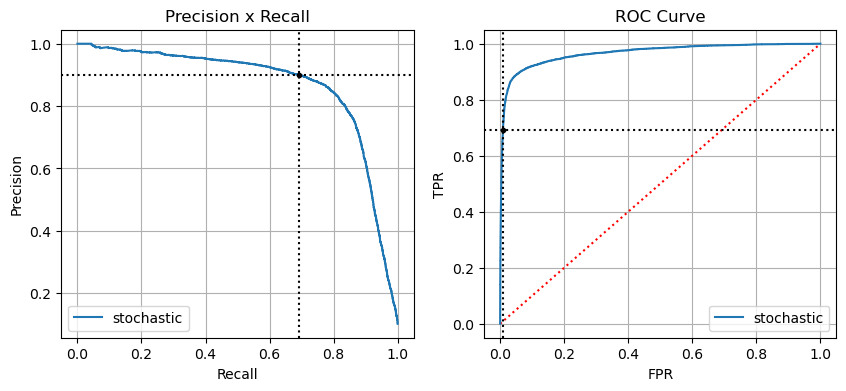

In [22]:
threshold = 0

prec, rec, thres = precision_recall_curve(y_number_train, y_predictions_stochastic_decision_func)
threshold = thres[np.argmax(prec >= 0.9)]
print(threshold)

plot_graphs(
    [stochastic],
    y_number_train,
    [y_predictions_stochastic_decision_func],
    thresholds=[threshold],
    labels=['stochastic'],
)

## Random Forest

In [23]:
forest.fit(X_train, y_number_train)

RandomForestClassifier()

In [24]:
y_predictions_forest = cross_val_predict(
    stochastic,
    X_train,
    y_number_train,
    cv=3
)

In [25]:
y_predictions_forest

array([False, False, False, ..., False, False, False])

In [26]:
cm_forest = confusion_matrix(y_number_train, y_predictions_forest, labels=forest.classes_)
cm_forest

array([[49587,   700],
       [ 1352,  4361]], dtype=int64)

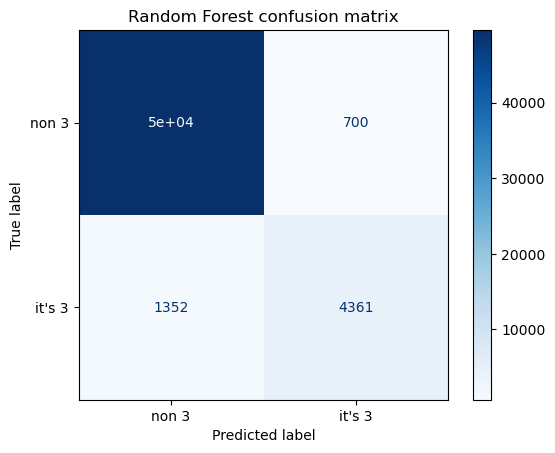

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['non {}'.format(number), "it's {}".format(number)]

cmd_forest = ConfusionMatrixDisplay(cm_forest, display_labels=labels)
cmd_forest.plot(cmap='Blues')
cmd_forest.ax_.set_title('Random Forest confusion matrix')
print()

In [28]:
y_precision_forest = precision_score(y_number_train, y_predictions_forest)
y_recall_forest = recall_score(y_number_train, y_predictions_forest)
y_f1_forest = f1_score(y_number_train, y_predictions_forest)

print('precision :', y_precision_forest)
print('   recall :', y_recall_forest)
print(' f1 score :', y_f1_forest)

precision : 0.8616874135546335
   recall : 0.7633467530194293
 f1 score : 0.8095414887692592


In [29]:
y_predictions_forest_proba = cross_val_predict(
    forest,
    X_train,
    y_number_train,
    cv=3,
    method='predict_proba'
)

y_predictions_forest_proba

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

0.33
Threshold: ( precision: 0.953350144092219, recall: 0.9264834587782251 )
Threshold: ( tpr: 0.9264834587782251, fpr: 0.005150436494521447 )
AUC forest : 0.9960195570023898


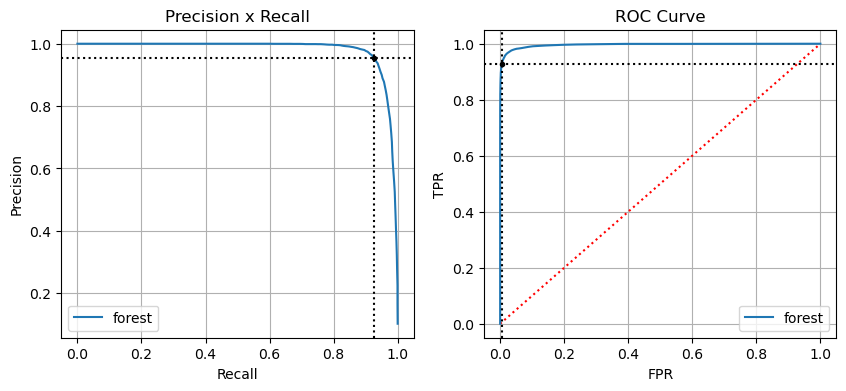

In [30]:
prec, rec, thres = precision_recall_curve(y_number_train, y_predictions_forest_proba[:, 1])
threshold = thres[np.argmax(prec >= 0.95)]

print(threshold)

plot_graphs(
    [forest],
    y_number_train,
    [y_predictions_forest_proba[:,1]],
    thresholds=[threshold],
    labels=['forest']
)

## Model comparison

AUC stochastic : 0.9665324294283353
AUC forest : 0.9960195570023898


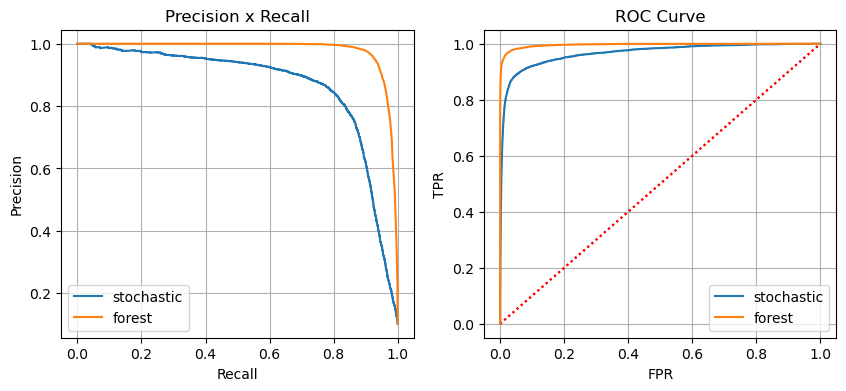

In [32]:
plot_graphs(
    [stochastic, forest],
    y_number_train,
    [y_predictions_stochastic_decision_func, y_predictions_forest_proba[:,1]],
    labels=['stochastic', 'forest']
)

# Test

In [34]:
y_number_test = (y_test == number)
y_number_test

64800    False
42024     True
9693     False
36451    False
76       False
         ...  
46667    False
28577    False
48907    False
53709    False
31293    False
Name: class, Length: 14000, dtype: bool

In [46]:
y_pred = cross_val_predict(
    forest,
    X_test,
    y_number_test,
    cv=3
)

In [47]:
cm_forest_test = confusion_matrix(y_number_test, y_pred, labels=forest.classes_)
cm_forest_test

array([[12561,    11],
       [  348,  1080]], dtype=int64)

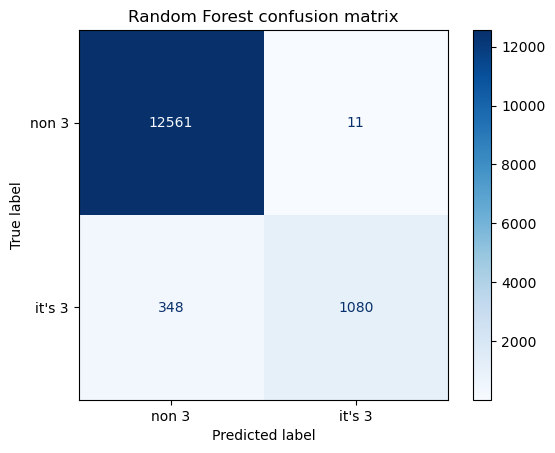

In [48]:
labels = ['non {}'.format(number), "it's {}".format(number)]

cmd_forest_test = ConfusionMatrixDisplay(cm_forest_test, display_labels=labels)
cmd_forest_test.plot(cmap='Blues')
cmd_forest_test.ax_.set_title('Random Forest confusion matrix')
print()

In [52]:
y_precision_forest = precision_score(y_number_test, y_pred)
y_recall_forest = recall_score(y_number_test, y_pred)
y_f1_forest = f1_score(y_number_test, y_pred)

print('precision :', y_precision_forest)
print('   recall :', y_recall_forest)
print(' f1 score :', y_f1_forest)

precision : 0.9899175068744271
   recall : 0.7563025210084033
 f1 score : 0.8574831282254863


In [53]:
y_proba = cross_val_predict(
    forest,
    X_test,
    y_number_test,
    cv=3,
    method='predict_proba'
)

Threshold at 0.31
f1 score :  0.9101881434149804

Threshold: ( precision: 0.9229661627069834, recall: 0.8977591036414566 )
Threshold: ( tpr: 0.8977591036414566, fpr: 0.00851097677378301 )
AUC forest : 0.9923504758250739


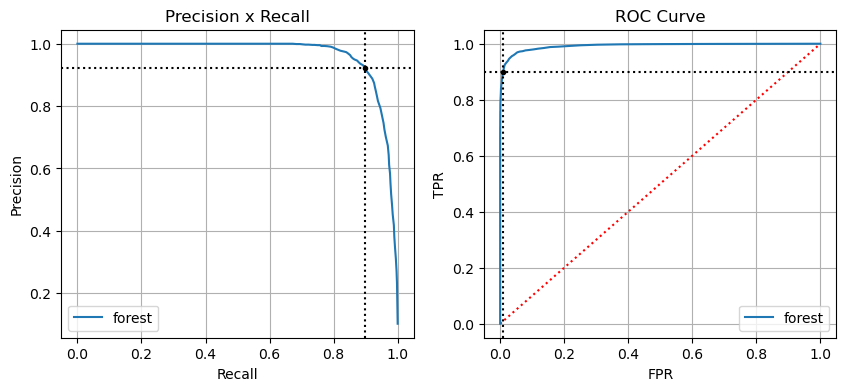

In [81]:
prec, rec, thres = precision_recall_curve(y_number_test, y_proba[:, 1])

# threshold = thres[np.argmax(prec >= 0.95)] # recall == 0.86, f1 == 0.90
threshold = thres[np.argmax(rec <= 0.90)] # precision == 0.92, f1 == 0.91
# threshold = thres[np.argmax(prec >= 0.90)] # recall == 0.90, f1 == 0.90

y_s = (y_proba[:,1] >= threshold)
f1 = f1_score(y_number_test, y_s)

print('Threshold at', threshold)
print('f1 score : ', f1)
print()

plot_graphs(
    [forest],
    y_number_test,
    [y_proba[:,1]],
    thresholds=[threshold],
    labels=['forest']
)